<a href="https://colab.research.google.com/github/Cristian2820/Senales-y-sistemas/blob/main/1_IntroduccionSyS/%20Ejercicio%2014/11/2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

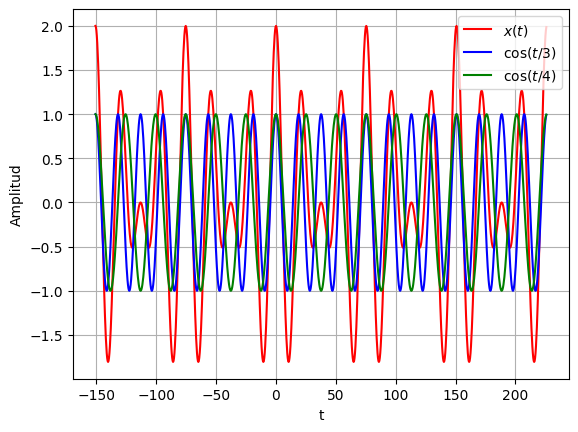

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# Definir parámetros de la señal
A1 = 1
A2 = 1
w1 = 1/3
w2 = 1/4
T1 = 2*np.pi / w1
T2 = 2*np.pi / w2
F1 = w1/(2*np.pi)
F2 = w2/(2*np.pi)
#Definir freq muestreo segun nyquist
Fs = 50*max(F1,F2)
#Periodo señal cuasiperiodica T=mcm(T1,T2)
T= 24*np.pi
#definir vectore de ti¿empo

ti=-2*T
tf= 3*T
tv= np.arange(ti,tf,1/Fs)

#Construir señal
phi2=0
x=A1*np.cos(w1*tv)+A2*np.cos(w2*tv+phi2)
xc= A1*np.cos(w1*tv)
Xs= A2*np.cos(w2*tv+phi2)

plt.plot(tv,x,'r', label='$x(t)$')
plt.plot(tv,xc,'b',label='$\cos(t/3)$')
plt.plot(tv,Xs,'g',label='$\cos(t/4)$')
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

In [14]:
y_min = 0 # valor min después de cero y pendiente
y_max = 5 # valor max después de cero y pendiente
#crear funcion en python
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

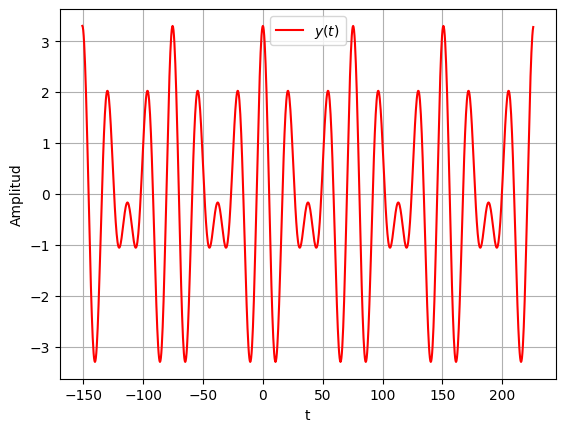

In [18]:
ymin = -3.3
ymax = 3.3
yv = my_ceropen(x,ymin,ymax) #se llama la función definida en la celda anterior
plt.plot(tv, yv, c='r', label='$y(t)$')
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

In [19]:
nbits = 4
nun_est = 2**nbits
vq = np.linspace(ymin,ymax,2**nbits)
vq

array([-3.3 , -2.86, -2.42, -1.98, -1.54, -1.1 , -0.66, -0.22,  0.22,
        0.66,  1.1 ,  1.54,  1.98,  2.42,  2.86,  3.3 ])

In [23]:
from scipy.spatial.distance import cdist
#distancias y cero pendiente a vector cuantizacion
d = cdist(yv.reshape(-1,1),vq.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape

(1000, 16)

In [24]:
#se requiere identificar el elemento ve[j] más cercano a y[i] para genera señal cuantizada
ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
ind

array([15, 15, 15, 15, 14, 14, 13, 13, 12, 11, 11, 10,  9,  8,  7,  7,  6,
        5,  4,  3,  3,  2,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        2,  2,  3,  3,  4,  4,  5,  6,  7,  7,  8,  9,  9, 10, 10, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 10, 10,  9,  9,
        9,  8,  8,  7,  7,  7,  6,  6,  6,  6,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  8,  8,  9,  9,  9, 10,
       10, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 10,
       10,  9,  9,  8,  7,  7,  6,  5,  4,  4,  3,  3,  2,  2,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  2,  2,  3,  3,  4,  5,  6,  7,  7,
        8,  9, 10, 11, 11, 12, 13, 13, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       14, 14, 13, 13, 12, 11, 11, 10,  9,  8,  7,  7,  6,  5,  4,  3,  3,
        2,  2,  1,  1,  0

In [25]:
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [26]:
for i in range(yv.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(yv[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(yv[i],vq)) #apilar datos cuantizando si i>0

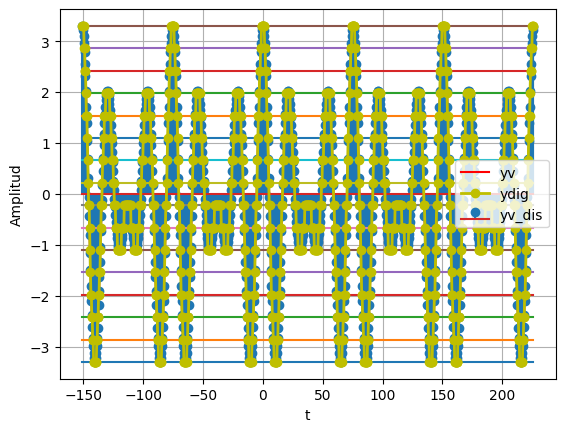

In [28]:
#graficar señales

plt.plot(tv,yv,c='r', label='yv')#cs continua

plt.stem(tv,yv, label='yv_dis')#cs discreta

#estados de cuantización

for v in vq:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()
